In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurkal

import itertools
from matplotlib import pyplot as plt
from matplotlib import rc, rcParams
import numpy as np
import seaborn as sns

In [3]:
# make Numpy raise warnings as exceptions (or not)
np.seterr(all='warn')
#np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [4]:
## Plot style setup
#rc('mathtext', default='regular')
#rcParams.update({'figure.autolayout': True})
sns.set_style("ticks")
#set_palette = lambda: itertools.cycle(sns.color_palette("cubehelix", 8))
set_palette = lambda: itertools.cycle(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

In [5]:
def input_act(x, x_i):
    return 3 * (np.exp(2 * (np.cos(np.deg2rad(x - x_i)) - 1)) + 0.01)

In [8]:
# dynamical parameters
M = [[1]]  # internal model dynamics
B = [[0.003]]   # constant "motor" dynamics
Z = [[0.00001]]  # motor noise variance
c = [[1]]

In [7]:
# simulation parameters
p = 20  # units in input networks
th_r = [-180, 180]
d_th = [1, 2]
steps = int(np.diff(d_th) / B[0][0])  # number of timesteps
t_f = 100
ts = np.linspace(0, t_f, steps)

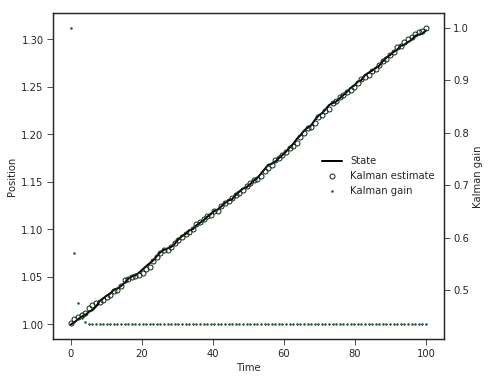

In [28]:
ts = np.linspace(0, 100, 100)

# dynamical parameters
M = 1  # internal model dynamics
a = 0.003   # constant "motor" dynamics
Z = 0.001   # motor noise variance
Q = 0.003

sigma = [1e12]
k = []
x = [1]
x_est = []
x_f = 0
for i, t in enumerate(ts):
    k.append(sigma[-1] / (sigma[-1] + Q))
    x_s = x[-1] + np.random.normal(0, Q)
    x_est.append((1 - k[-1]) * x_f + k[-1] * x_s)
    x_f = x_est[-1] + a 
    x.append(x[i] + a + np.random.normal(0, Z))
    sigma.append((1 - k[-1]) * sigma[-1] * (1 - k[-1]) + k[-1] * Q * k[-1] + Z)

palette = set_palette()
fig, ax1 = plt.subplots(figsize=(7, 6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Position")
p1, = ax1.plot(ts, x[:-1], '-', color=next(palette), label="State", lw=2)
p2, = ax1.plot(ts, x_est, 'o', color=next(palette), label="Kalman estimate", markerfacecolor='none', ms=5)
ax2 = ax1.twinx()
ax2.set_ylabel("Kalman gain")
p3, = ax2.plot(ts, k, '.', color=next(palette), label="Kalman gain", ms=3)

ps = [p1, p2, p3]
labels = [p.get_label() for p in ps]
ax1.legend(ps, labels, loc=7)
plt.show()